## Case Studies in Artificial Intelligence and Machine Learning
### Unit 4: Interim Results

### Group 4
| Student Id     | Name                     |
|----------------|--------------------------|
| 9027375        | Khushbu Lad              |
| 8944328        | Akshata Madhav           |
| 8964515        | Neha Yadav               |
| 8965985        | Pradeepti Kasam          |
| 8914803        | Rohit Totlani            |

Dataset URL:

[Skin Cancer MNIST: HAM10000](https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000)

### Step 1: Install Required Libraries

In [54]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Step 2: Import Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import sys
import os

### Step 3: Load the Dataset

**NOTE:**

- Our dataset is large containing images of 2.9GB.
- The file is configured as it can run in local as well as in google collab.
- if you are setting up file for google drive, no configuration is requred.
- if this project needs to setup in local device, download the dataset from link in header and extract zip in "dataset" folder in project directory
- Required file to run EDA is already available in this repository on path
- Set the correct file path for the dataset:
- data_path = "./HAM10000_metadata.csv"
- Ensure that the path is updated to match the actual location of the file on your system.


In [56]:
# Detect Google Colab
IN_COLAB = False
try:
    import google.colab
    IN_COLAB = True
except ModuleNotFoundError:
    pass

In [ ]:
# Detect Google Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_PATH = "/content/drive/MyDrive/dataset/" 
else:
    DATA_PATH = "./"

# Download dataset in kaggle
if IN_COLAB and not os.path.exists(DATA_PATH + "HAM10000_metadata.csv"):
    !pip install kaggle
    from google.colab import files
    files.upload()  # Upload kaggle.json manually (for API authentication)

    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 -p {DATA_PATH} --unzip
    print("Dataset downloaded and extracted.")

# Initialize required path
metadata_path = os.path.join(DATA_PATH, "HAM10000_metadata.csv")
images_path = os.path.join(DATA_PATH, "HAM10000_images_part_1/")

df = pd.read_csv(metadata_path)

In [58]:
#code to check sample data
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


### Step 4: Basic Exploration

In [59]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print("\n")
print("Column Names:", df.columns)
print("\n")
print("Missing Values:\n", df.isnull().sum())

Number of rows:  10015
Number of columns:  7


Column Names: Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')


Missing Values:
 lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


### Step 5: Data Preprocessing


1. Age column has 57 missing value, updating missing value with median

In [60]:
# Fill missing age values with the median age
df['age'] = df['age'].fillna(df['age'].median())

2. There are 3 categorical variables, Using label encoder to convert these string to numerical columns
    1. Gender
    2. Diagnosis class
    3. Localization


In [61]:
# Encode categorical variables
le_sex = LabelEncoder()
# 0 = Female, 1 = Male, 2= unknown
df['sex'] = le_sex.fit_transform(df['sex'])

le_dx = LabelEncoder()
# Encodes the 7 diagnosis classes
#0-akiec, 1-bcc, 2-bkl, 3-df, 4-mel, 5-nv, 6-vasc
df['dx'] = le_dx.fit_transform(df['dx'])

le_localization = LabelEncoder()
# Encodes the 15 localization classes
# 0-abdomen, 1- acral, 2-back, 3-chest, 4- ear, 5-face, 6-foot, 7-genital, 8-hand, 9-lower extremity, 10-neck, 11-scalp, 12-trunk, 13-unknown, 14-upper extremity
df['localization'] = le_localization.fit_transform(df['localization'])

#check sample data
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,2,histo,80.0,1,11
1,HAM_0000118,ISIC_0025030,2,histo,80.0,1,11
2,HAM_0002730,ISIC_0026769,2,histo,80.0,1,11
3,HAM_0002730,ISIC_0025661,2,histo,80.0,1,11
4,HAM_0001466,ISIC_0031633,2,histo,75.0,1,4


### Step 6: Exploratory Data Analysis (EDA)

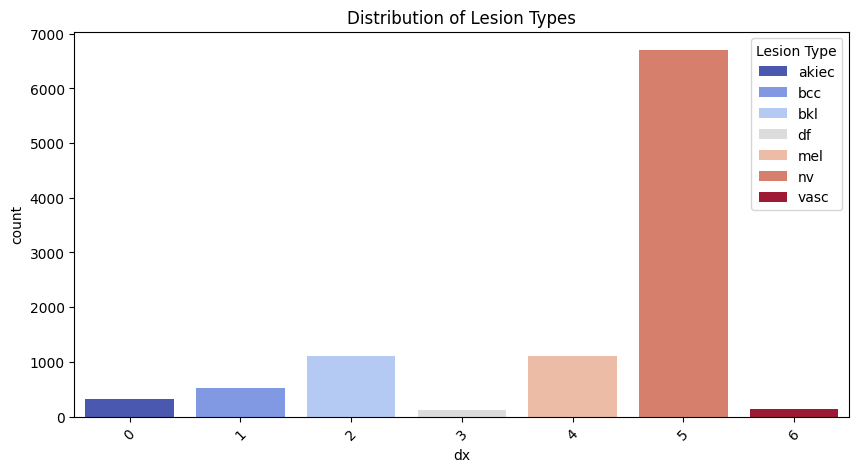

In [62]:
# Plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='dx', hue='dx', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Distribution of Lesion Types")

# Create custom legend labels
legend_labels = {
    0: 'akiec',
    1: 'bcc',
    2: 'bkl',
    3: 'df',
    4: 'mel',
    5: 'nv',
    6: 'vasc'
}

# Get the current handles and labels from the plot
handles, labels = plt.gca().get_legend_handles_labels()

# Create a new list of legend labels using the custom mapping
new_labels = [legend_labels[int(label)] for label in labels]

# Create the legend with the updated labels
plt.legend(handles, new_labels, title='Lesion Type')

plt.show()


#### Type of lesions

- akiec (Actinic keratoses and intraepithelial carcinoma)
- bcc (Basal cell carcinoma)
- bkl (Benign keratosis-like lesions)
- df (Dermatofibroma)
- mel (Melanoma)
- nv (Melanocytic nevi)
- vasc (Vascular lesions)

The plot above suggests that melanocytic nevi are the most common type of skin lesion in the dataset.

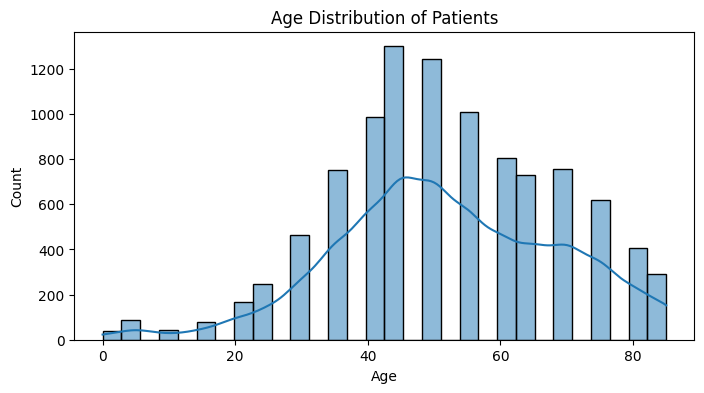

In [63]:
# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.show()

- The plot represents the age distribution of patients in the dataset.
- It shows that most patients are between 30 and 60 years old, with a peak around the 40s.
- The distribution indicates a higher frequency of older patients compared to younger ones.

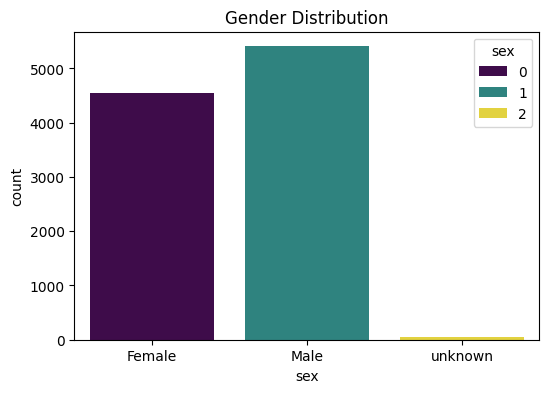

In [64]:
# Sex distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='sex', data=df, palette='viridis')
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'unknown'])
plt.title("Gender Distribution")
plt.show()

- The plot indicates that Males are most affected with skin cancer as compared to females and unknown

### Step 7: Statistical Tests

**t-test:**

A t-test is a statistical test used to compare the means of two groups to determine if they are significantly different from each other. It is commonly used in hypothesis testing.

**Benign Lesions**
The benign category includes non-cancerous (harmless) lesions:
bkl (Benign keratosis-like lesions)
nv (Melanocytic nevi - common moles)
These lesions are generally not life-threatening and do not spread aggressively.

**Malignant Lesions**
The malignant category includes cancerous (harmful) lesions:
mel (Melanoma - the deadliest form of skin cancer)
bcc (Basal cell carcinoma - a slow-growing skin cancer)
akiec (Actinic keratoses and intraepithelial carcinoma - precancerous/cancerous growths)
These lesions have the potential to invade nearby tissues and spread if not treated.

In [65]:
# Hypothesis: Is there a significant difference in age between benign & malignant lesions?
benign = df[df['dx'].isin([le_dx.transform(['bkl'])[0], le_dx.transform(['nv'])[0]])]['age']
malignant = df[df['dx'].isin([le_dx.transform(['mel'])[0], le_dx.transform(['bcc'])[0], le_dx.transform(['akiec'])[0]])]['age']

In [66]:
# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(benign, malignant, equal_var=False)
print(f"T-test result: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("\n Statistically significant difference in age between benign and malignant lesions.")
else:
    print("\n No significant difference in age between benign and malignant lesions.")

T-test result: t-statistic = -37.9242, p-value = 0.0000

 Statistically significant difference in age between benign and malignant lesions.


### Step 8: Hypothesis Evaluation

**Chi-Square Test :**

The Chi-Square test is a statistical test used to determine if there is a significant association between categorical variables. In this dataset, it can be applied to check if factors like lesion type and patient gender are independent or correlated.

In [67]:
# Chi-Square test for gender distribution across lesion types
contingency_table = pd.crosstab(df['sex'], df['dx'])
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2_stat:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("\n Statistically significant association between gender and lesion type.")
else:
    print("\n No significant association between gender and lesion type.")

Chi-Square Test: chi2 = 106.9038, p-value = 0.0000

 Statistically significant association between gender and lesion type.


### Step 9: Observations & Summary

**Key Findings**

**Statistical Tests & Hypothesis Evaluation**

t-test was conducted to compare means between different groups.

Chi-Square test for gender distribution across lesion types.

**Potential Challenges**

Class Imbalance:

Some lesion types (e.g., Melanocytic nevi) dominate, while others are underrepresented.

This could bias the model toward predicting the most common class.

**Data Bias:**

Higher representation of certain age groups may lead to a model that performs better on middle-aged individuals but poorly on younger or older patients.

**Feature Engineering Needed:**

Image-based features may need augmentation techniques to balance classes.